#Multi-Layer Perceptron (Minggu 7)

#Pengambilan Data

In [6]:
# Keknya downgrade numpy
# !pip install numpy==1.24.3
import yfinance as yf
import pandas as pd
import numpy as np

data = yf.download("MSFT", start = "2017-01-01", end = "2023-12-31", auto_adjust=False, multi_level_index=False)
data

[*********************100%***********************]  1 of 1 completed


,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
2017-01-03,56.601135,62.580002,62.840000,62.130001,62.790001,20694100
2017-01-04,56.347881,62.299999,62.750000,62.119999,62.480000,21340000
2017-01-05,56.347881,62.299999,62.660000,62.029999,62.189999,24876000
2017-01-06,56.836292,62.840000,63.150002,62.040001,62.299999,19922900
2017-01-09,56.655396,62.639999,63.080002,62.540001,62.759998,20382700
...,...,...,...,...,...,...
2023-12-22,371.055664,374.579987,375.179993,372.709991,373.679993,17091100
2023-12-26,371.134979,374.660004,376.940002,373.500000,375.000000,12673100
2023-12-27,370.550507,374.070007,375.059998,372.809998,373.690002,14905400


In [7]:
len(data)

1760

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1760 entries, 2017-01-03 to 2023-12-29
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Adj Close  1760 non-null   float64
 1   Close      1760 non-null   float64
 2   High       1760 non-null   float64
 3   Low        1760 non-null   float64
 4   Open       1760 non-null   float64
 5   Volume     1760 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 96.2 KB


In [9]:
data.describe()

,Adj Close,Close,High,Low,Open,Volume
count,1760.000000,1760.000000,1760.000000,1760.000000,1760.000000,1.760000e+03
mean,186.950653,193.546824,195.437313,191.462017,193.484682,2.874609e+07
std,91.735783,91.625434,92.530113,90.628265,91.587039,1.230515e+07
min,56.347881,62.299999,62.660000,61.950001,62.189999,7.425600e+06
25%,99.879560,106.277498,107.687498,105.282497,106.355001,2.096685e+07
50%,193.509460,201.605003,203.799995,197.625000,200.235001,2.569430e+07
75%,265.765427,271.667503,274.679993,268.087509,271.797493,3.288820e+07
max,379.099335,382.700012,384.299988,378.160004,383.760010,1.112421e+08


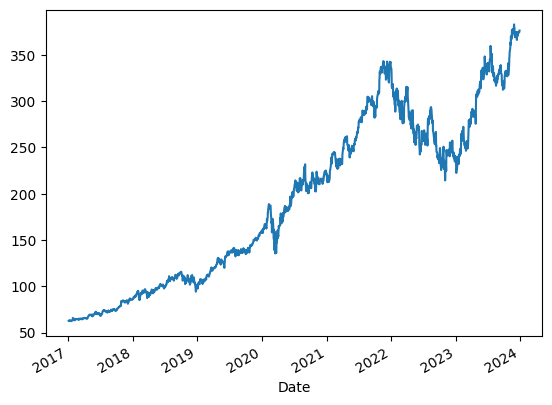

In [10]:
#Pergerakan harga sahan apple
import matplotlib.pyplot as plt
data.Close.plot()
plt.show()

In [11]:
#Melihat return harian (Setiap hari naik dan turun berapa %)
data['Return'] = data['Close'].pct_change() * 100
data

,Adj Close,Close,High,Low,Open,Volume,Return
Date,,,,,,,
2017-01-03,56.601135,62.580002,62.840000,62.130001,62.790001,20694100,NaN
2017-01-04,56.347881,62.299999,62.750000,62.119999,62.480000,21340000,-0.447431
2017-01-05,56.347881,62.299999,62.660000,62.029999,62.189999,24876000,0.000000
2017-01-06,56.836292,62.840000,63.150002,62.040001,62.299999,19922900,0.866775
2017-01-09,56.655396,62.639999,63.080002,62.540001,62.759998,20382700,-0.318270
...,...,...,...,...,...,...,...
2023-12-22,371.055664,374.579987,375.179993,372.709991,373.679993,17091100,0.278411
2023-12-26,371.134979,374.660004,376.940002,373.500000,375.000000,12673100,0.021362
2023-12-27,370.550507,374.070007,375.059998,372.809998,373.690002,14905400,-0.157475


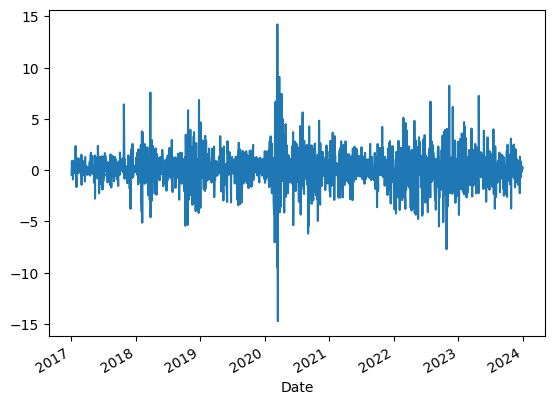

In [12]:
data.Return.plot()
plt.show()

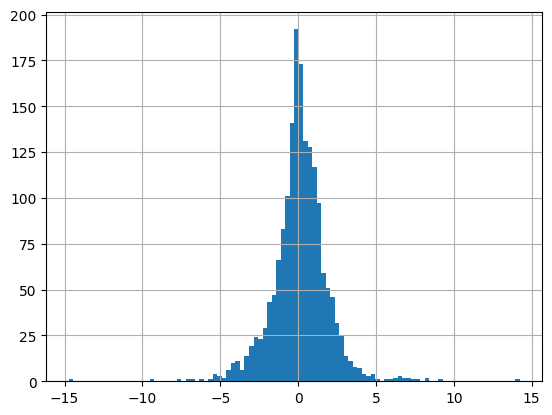

In [13]:
data.Return.hist(bins=100)
plt.show()

#Ini Label, label paling bagus itu manual kata pak yuan

In [14]:
data ['Close10DaysAhead'] = data['Close'].shift(-10)  #Harga close 10 hari ke depan
data

,Adj Close,Close,High,Low,Open,Volume,Return,Close10DaysAhead
Date,,,,,,,,
2017-01-03,56.601135,62.580002,62.840000,62.130001,62.790001,20694100,NaN,62.500000
2017-01-04,56.347881,62.299999,62.750000,62.119999,62.480000,21340000,-0.447431,62.299999
2017-01-05,56.347881,62.299999,62.660000,62.029999,62.189999,24876000,0.000000,62.740002
2017-01-06,56.836292,62.840000,63.150002,62.040001,62.299999,19922900,0.866775,62.959999
2017-01-09,56.655396,62.639999,63.080002,62.540001,62.759998,20382700,-0.318270,63.520000
...,...,...,...,...,...,...,...,...
2023-12-22,371.055664,374.579987,375.179993,372.709991,373.679993,17091100,0.278411,NaN
2023-12-26,371.134979,374.660004,376.940002,373.500000,375.000000,12673100,0.021362,NaN
2023-12-27,370.550507,374.070007,375.059998,372.809998,373.690002,14905400,-0.157475,NaN


In [15]:
data['Label'] = np.where(data['Close10DaysAhead'] > data['Close'], "Up", "Down")  #Label hanya ada 2, up dan down
data

,Adj Close,Close,High,Low,Open,Volume,Return,Close10DaysAhead,Label
Date,,,,,,,,,
2017-01-03,56.601135,62.580002,62.840000,62.130001,62.790001,20694100,NaN,62.500000,Down
2017-01-04,56.347881,62.299999,62.750000,62.119999,62.480000,21340000,-0.447431,62.299999,Down
2017-01-05,56.347881,62.299999,62.660000,62.029999,62.189999,24876000,0.000000,62.740002,Up
2017-01-06,56.836292,62.840000,63.150002,62.040001,62.299999,19922900,0.866775,62.959999,Up
2017-01-09,56.655396,62.639999,63.080002,62.540001,62.759998,20382700,-0.318270,63.520000,Up
...,...,...,...,...,...,...,...,...,...
2023-12-22,371.055664,374.579987,375.179993,372.709991,373.679993,17091100,0.278411,NaN,Down
2023-12-26,371.134979,374.660004,376.940002,373.500000,375.000000,12673100,0.021362,NaN,Down
2023-12-27,370.550507,374.070007,375.059998,372.809998,373.690002,14905400,-0.157475,NaN,Down


In [16]:
data.Label.value_counts()

,count
Label,
Up,1110
Down,650


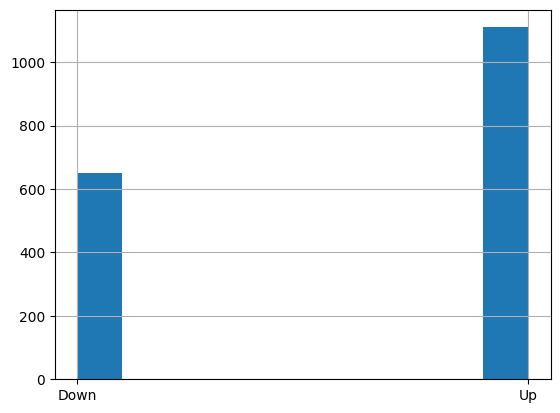

In [17]:
data.Label.hist()   #Hati2, data tidak seimbang, sebaiknya data disamakan.
plt.show()

#Analisis Teknikal sebagai indikator / atribut / features

In [18]:
!pip install pandas_ta
import pandas_ta as ta
data['RSI14'] = ta.rsi(data['Close'], length=14)
macd = ta.macd(data['Close'])
data['MACD'] = macd['MACD_12_26_9']
data['EMA8'] = ta.ema(data['Close'], length=8)
data['EMA20'] = ta.ema(data['Close'], length=20)
data['EMA50'] = ta.ema(data['Close'], length=50)
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1760 entries, 2017-01-03 to 2023-12-29
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Adj Close         1760 non-null   float64
 1   Close             1760 non-null   float64
 2   High              1760 non-null   float64
 3   Low               1760 non-null   float64
 4   Open              1760 non-null   float64
 5   Volume            1760 non-null   int64  
 6   Return            1759 non-null   float64
 7   Close10DaysAhead  1750 non-null   float64
 8   Label             1760 non-null   object 
 9   RSI14             1746 non-null   float64
 10  MACD              1735 non-null   float64
 11  EMA8              1753 non-null   float64
 12  EMA20             1741 non-null   float64
 13  EMA50             1711 non-null   float64
dtypes: float64(12), int64(1), object(1)
memory usage: 270.8+ KB


,Adj Close,Close,High,Low,Open,Volume,Return,Close10DaysAhead,RSI14,MACD,EMA8,EMA20,EMA50
count,1760.000000,1760.000000,1760.000000,1760.000000,1760.000000,1.760000e+03,1759.000000,1750.000000,1746.000000,1735.000000,1753.000000,1741.000000,1711.000000
mean,186.950653,193.546824,195.437313,191.462017,193.484682,2.874609e+07,0.118065,194.294914,56.166277,1.235348,193.447366,193.281022,192.968499
std,91.735783,91.625434,92.530113,90.628265,91.587039,1.230515e+07,1.792960,91.349149,10.709562,3.437693,91.140995,90.360239,88.561789
min,56.347881,62.299999,62.660000,61.950001,62.189999,7.425600e+06,-14.739031,62.299999,26.419420,-9.487692,62.529903,63.192000,63.847800
25%,99.879560,106.277498,107.687498,105.282497,106.355001,2.096685e+07,-0.713079,106.875002,48.822926,-0.015112,106.779630,107.093569,107.418266
50%,193.509460,201.605003,203.799995,197.625000,200.235001,2.569430e+07,0.115711,202.539993,55.805494,1.049165,204.445652,203.955170,200.543427
75%,265.765427,271.667503,274.679993,268.087509,271.797493,3.288820e+07,1.028423,272.215012,63.950417,2.740115,269.145334,268.758822,269.340744
max,379.099335,382.700012,384.299988,378.160004,383.760010,1.112421e+08,14.216888,382.700012,89.185916,11.527259,377.271954,372.613277,363.634157


#Normalisasi dengan Scaler dengan Scikit learn

In [19]:
from sklearn.preprocessing import StandardScaler  #Mengubah menjadi distribusi normal

#Buat objek scaler
scaler = StandardScaler()
for col in data.columns:
  if col !='Label':
    data[col] = scaler.fit_transform(data[col].values.reshape(-1,1)) + 2
data

,Adj Close,Close,High,Low,Open,Volume,Return,Close10DaysAhead,Label,RSI14,MACD,EMA8,EMA20,EMA50
Date,,,,,,,,,,,,,,
2017-01-03,0.578673,0.570222,0.566575,0.572534,0.572595,1.345455,NaN,0.556827,Down,NaN,NaN,NaN,NaN,NaN
2017-01-04,0.575911,0.567165,0.565602,0.572424,0.569209,1.397960,1.684512,0.554637,Down,NaN,NaN,NaN,NaN,NaN
2017-01-05,0.575911,0.567165,0.564629,0.571430,0.566042,1.685401,1.934132,0.559455,Up,NaN,NaN,NaN,NaN,NaN
2017-01-06,0.581237,0.573060,0.569926,0.571541,0.567243,1.282764,2.417702,0.561864,Up,NaN,NaN,NaN,NaN,NaN
2017-01-09,0.579264,0.570877,0.569169,0.577059,0.572267,1.320141,1.756571,0.567997,Up,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-22,4.007475,3.976358,3.943084,4.000474,3.968035,1.052567,2.089457,NaN,Down,2.006470,2.444036,3.967197,3.971758,3.905288
2023-12-26,4.008340,3.977231,3.962110,4.009193,3.982452,0.693428,1.946050,NaN,Down,2.014389,2.434275,3.972005,3.975197,3.911049
2023-12-27,4.001967,3.970790,3.941787,4.001578,3.968145,0.874892,1.846278,NaN,Down,1.934689,2.403886,3.974306,3.977686,3.916322


In [20]:
#Ngedrop data yang Not a Number (NaN)
data = data.dropna()
dataset = data[['Close','RSI14', 'MACD', 'EMA8', 'EMA20','EMA50','Label']]
dataset

,Close,RSI14,MACD,EMA8,EMA20,EMA50,Label
Date,,,,,,,
2017-03-15,0.593912,1.894124,1.710169,0.586180,0.573771,0.541601,Up
2017-03-16,0.592711,1.758263,1.706465,0.586211,0.573978,0.541952,Up
2017-03-17,0.595222,2.001826,1.708150,0.586796,0.574408,0.542391,Up
2017-03-20,0.595877,2.065402,1.710093,0.587398,0.574860,0.542839,Up
2017-03-21,0.588017,1.177319,1.694110,0.586110,0.574510,0.542951,Up
...,...,...,...,...,...,...,...
2023-12-08,3.972537,2.195547,3.363807,3.970962,3.954353,3.846705,Up
2023-12-11,3.940549,1.880994,3.202105,3.966739,3.955907,3.853275,Up
2023-12-12,3.974174,2.139764,3.129112,3.970966,3.960560,3.860951,Down


<Axes: >

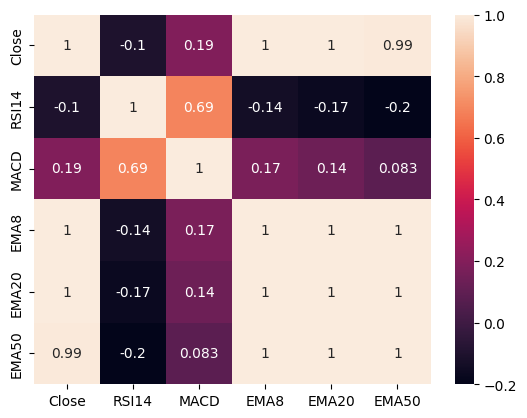

In [21]:
#Grafik korelasi, label ga bisa di heatmap
import seaborn as sns
heatmap_data = dataset[['Close','RSI14', 'MACD', 'EMA8', 'EMA20','EMA50']]
sns.heatmap(heatmap_data.corr(), annot=True)

#Model KNN

In [22]:
#Split dataset untuk training dan testing
from sklearn.model_selection import train_test_split
#KNN
from sklearn.neighbors import KNeighborsClassifier
#evaluasi model
from sklearn.metrics import classification_report, confusion_matrix

In [23]:
knn = KNeighborsClassifier(n_neighbors=3)

In [24]:
#Atribut
X = dataset.drop('Label', axis = 1)
#Label
Y = dataset['Label']

#Memisahkan 30% sebagai test dan sisanya sebagai train, secara random ya
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state = 7)

In [25]:
#Masukan dataset ke dalam KNN
knn.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=3)

In [26]:
#Hitung Akurasi Model
from sklearn.metrics import accuracy_score
accuracy_score = knn.score(X_test, Y_test)
print(accuracy_score)

0.7534246575342466


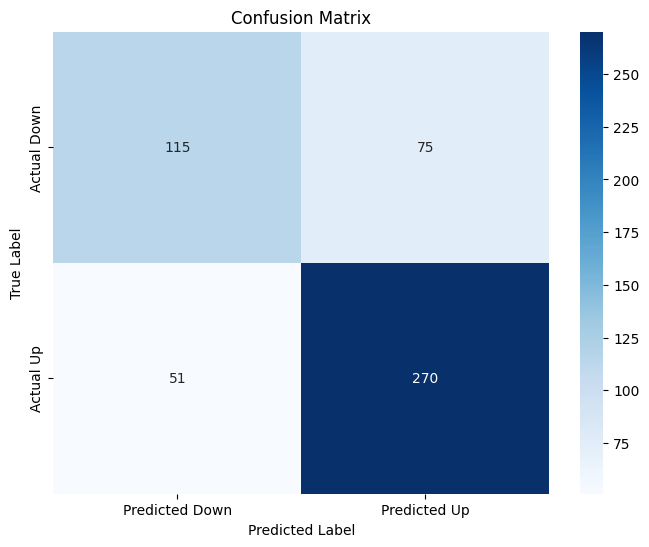

              precision    recall  f1-score   support

        Down       0.69      0.61      0.65       190
          Up       0.78      0.84      0.81       321

    accuracy                           0.75       511
   macro avg       0.74      0.72      0.73       511
weighted avg       0.75      0.75      0.75       511



In [27]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming Y_test contains the true labels for the test set
# and knn is your trained KNN model
y_pred = knn.predict(X_test)  # Get predictions on the test set

cm = confusion_matrix(Y_test, y_pred)  # Use Y_test instead of Y_forward_scaled

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Predicted Down', 'Predicted Up'],  # Assuming 'Down' and 'Up' are your labels
            yticklabels=['Actual Down', 'Actual Up'])  # Assuming 'Down' and 'Up' are your labels
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

print(classification_report(Y_test, y_pred))

#Multi-Layer Perceptron

In [107]:
from sklearn.neural_network import MLPClassifier

##Build MLP Object

In [108]:
mlp = MLPClassifier(hidden_layer_sizes=(32,64,128), max_iter=7500, activation='relu', solver='sgd', random_state=42, early_stopping=False, n_iter_no_change=7000, learning_rate_init=0.03, verbose = True)




###Train Model MLP (Menggunakan data train yang sudah displit pada model KNN)
Maks Error rate = 0.1 (10%) atau akurasi model diatas 90%

In [109]:
mlp.fit(X_train, Y_train)

Streaming output truncated to the last 5000 lines.
Iteration 2501, loss = 0.30801477
Iteration 2502, loss = 0.26705075
Iteration 2503, loss = 0.24075558
Iteration 2504, loss = 0.28053075
Iteration 2505, loss = 0.23026299
Iteration 2506, loss = 0.25639742
Iteration 2507, loss = 0.22995541
Iteration 2508, loss = 0.27463458
Iteration 2509, loss = 0.25400961
Iteration 2510, loss = 0.26834623
Iteration 2511, loss = 0.34331848
Iteration 2512, loss = 0.52034780
Iteration 2513, loss = 0.78923460
Iteration 2514, loss = 0.48167482
Iteration 2515, loss = 0.39615589
Iteration 2516, loss = 0.32266208
Iteration 2517, loss = 0.30644625
Iteration 2518, loss = 0.26729879
Iteration 2519, loss = 0.29168759
Iteration 2520, loss = 0.27172959
Iteration 2521, loss = 0.26070574
Iteration 2522, loss = 0.23497591
Iteration 2523, loss = 0.24121210
Iteration 2524, loss = 0.24903849
Iteration 2525, loss = 0.24570124
Iteration 2526, loss = 0.26877761
Iteration 2527, loss = 0.38144588
Iteration 2528, loss = 0.269089

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (7500) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(32, 64, 128), learning_rate_init=0.03,
              max_iter=7500, n_iter_no_change=7000, random_state=42,
              solver='sgd', verbose=True)

In [110]:
accuracy = mlp.score(X_test, Y_test)
print("Akurasi model MLP = ", accuracy)

Akurasi model MLP =  0.7025440313111546


In [111]:
mlp.loss_

print("MLP Training Loss = ", mlp.loss_)

MLP Training Loss =  0.04747874878491613


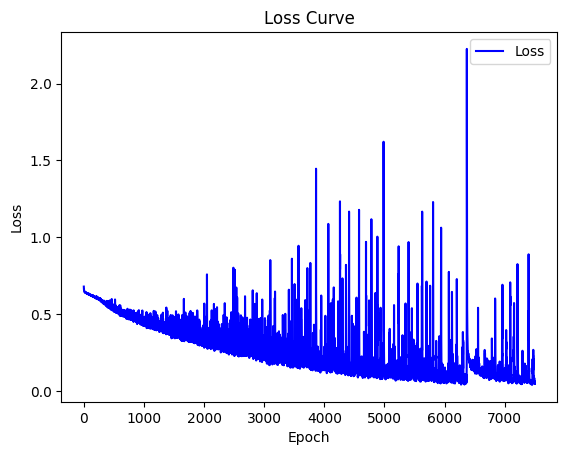

In [112]:
plt.plot(mlp.loss_curve_, label="Loss", color="blue")
plt.title("Loss Curve")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

## Confusion Matrix


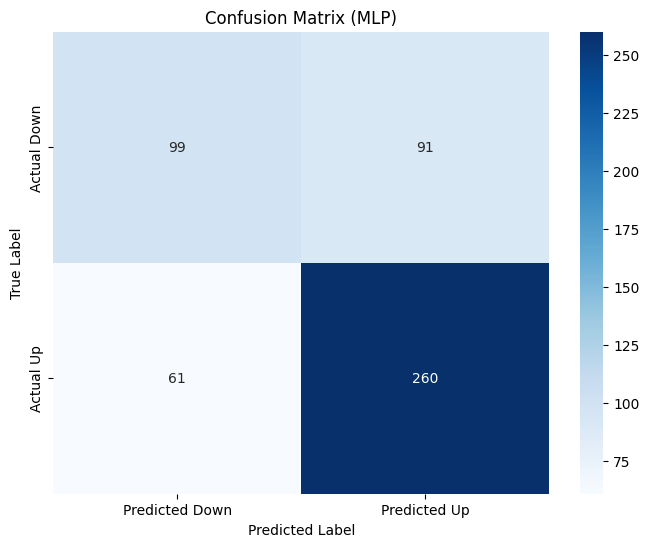

              precision    recall  f1-score   support

        Down       0.62      0.52      0.57       190
          Up       0.74      0.81      0.77       321

    accuracy                           0.70       511
   macro avg       0.68      0.67      0.67       511
weighted avg       0.70      0.70      0.70       511



In [113]:
y_pred_mlp = mlp.predict(X_test)
cm_mlp = confusion_matrix(Y_test, y_pred_mlp)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_mlp, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Predicted Down', 'Predicted Up'],
            yticklabels=['Actual Down', 'Actual Up'])
plt.title('Confusion Matrix (MLP)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

print(classification_report(Y_test, y_pred_mlp))
